In [1]:
import os
import pandas as pd
from tqdm import tqdm
from rsa_wrapper import rsa_wrapper
from vis_utils import load_up_result_by_task, create_figure_for_dataset

In [2]:
path = "./outputs"
os.makedirs(path, exist_ok=True)
path = "./outputs/split_halves"
os.makedirs(path, exist_ok=True)

# Run Nearest Neighbors and AnnaK intersubject RSA

this code produces a file in `outputs` with the results for each task

In [3]:
hbn_tasks = ['listsort', 'flanker', 'towre', 'cbcl', 'srs']

for task in tqdm(hbn_tasks):
    for fn in [ 'annak','nn']:  
            # Running the RSA using a mantel tests with 10k permutations 
            rsa_wrapper(ds='hbn',
                        task=task,
                        run='movieDM',
                        function=fn,
                        n_perms= 10000,
                        use_controls=True,
                        run_split_half=False)
            # Running the same as above, but split-half, to check out consistency across halves
            # If you don't care about consistency and just want the actual results,
            # This can next part can be commented out
            # Only using 2 perms since for this we just care about the r-vals, not p-vals
            rsa_wrapper(ds='hbn',
                        task=task,
                        run='movieDM',
                        function=fn,
                        n_perms= 2,
                        use_controls=True,
                        run_split_half=True)

  0%|                                                                                                          | 0/5 [00:00<?, ?it/s]

saving to:  outputs//out_hbn_movieDM_listsort_annak_10000_control.csv
saving to:  outputs/split_halves/out_hbn_movieDM_listsort_annak_2_control.csv
saving to:  outputs//out_hbn_movieDM_listsort_nn_10000_control.csv


 20%|███████████████████▍                                                                             | 1/5 [10:52<43:31, 652.80s/it]

saving to:  outputs/split_halves/out_hbn_movieDM_listsort_nn_2_control.csv
saving to:  outputs//out_hbn_movieDM_flanker_annak_10000_control.csv
saving to:  outputs/split_halves/out_hbn_movieDM_flanker_annak_2_control.csv
saving to:  outputs//out_hbn_movieDM_flanker_nn_10000_control.csv


 40%|██████████████████████████████████████▊                                                          | 2/5 [21:51<32:48, 656.26s/it]

saving to:  outputs/split_halves/out_hbn_movieDM_flanker_nn_2_control.csv
saving to:  outputs//out_hbn_movieDM_towre_annak_10000_control.csv
saving to:  outputs/split_halves/out_hbn_movieDM_towre_annak_2_control.csv
saving to:  outputs//out_hbn_movieDM_towre_nn_10000_control.csv


 60%|██████████████████████████████████████████████████████████▏                                      | 3/5 [33:00<22:04, 662.22s/it]

saving to:  outputs/split_halves/out_hbn_movieDM_towre_nn_2_control.csv
saving to:  outputs//out_hbn_movieDM_cbcl_annak_10000_control.csv
saving to:  outputs/split_halves/out_hbn_movieDM_cbcl_annak_2_control.csv
saving to:  outputs//out_hbn_movieDM_cbcl_nn_10000_control.csv


 80%|█████████████████████████████████████████████████████████████████████████████▌                   | 4/5 [43:45<10:55, 655.18s/it]

saving to:  outputs/split_halves/out_hbn_movieDM_cbcl_nn_2_control.csv
saving to:  outputs//out_hbn_movieDM_srs_annak_10000_control.csv
saving to:  outputs/split_halves/out_hbn_movieDM_srs_annak_2_control.csv
saving to:  outputs//out_hbn_movieDM_srs_nn_10000_control.csv


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [54:23<00:00, 652.70s/it]

saving to:  outputs/split_halves/out_hbn_movieDM_srs_nn_2_control.csv


# Check out one of the outputs files

This file has the AnnaK model outputs for the flanker task in the HBN dataset.

The first column is the node (0-267).

The r_val and p_val are the correlation and p-value we got for this node from the mantel test.

In [4]:
o = pd.read_csv(f'outputs/out_hbn_movieDM_flanker_annak_10000_control.csv')
o.head()

,Unnamed: 0,r_val,p_val,null_r_vals,run,task,function,n_perms,use_controls,dataset
0,0,0.028433,0.0078,"[np.float64(0.02843305882665921), np.float64(-...",movieDM,flanker,annak,10000,True,hbn
1,1,0.023068,0.0333,"[np.float64(0.0230677962784899), np.float64(0....",movieDM,flanker,annak,10000,True,hbn
2,2,0.029415,0.0591,"[np.float64(0.029415374292261643), np.float64(...",movieDM,flanker,annak,10000,True,hbn
3,3,0.006134,0.6248,"[np.float64(0.006134425485179969), np.float64(...",movieDM,flanker,annak,10000,True,hbn
4,4,0.013815,0.3598,"[np.float64(0.013815498207800921), np.float64(...",movieDM,flanker,annak,10000,True,hbn


# Visualize the results

Note -- if you run this with the files in outputs folder already included the repo you will see the viz below.

But if you run rsa_wrapper above (which uses the fake data included in `hbn_behav.csv`) ou will see different plots

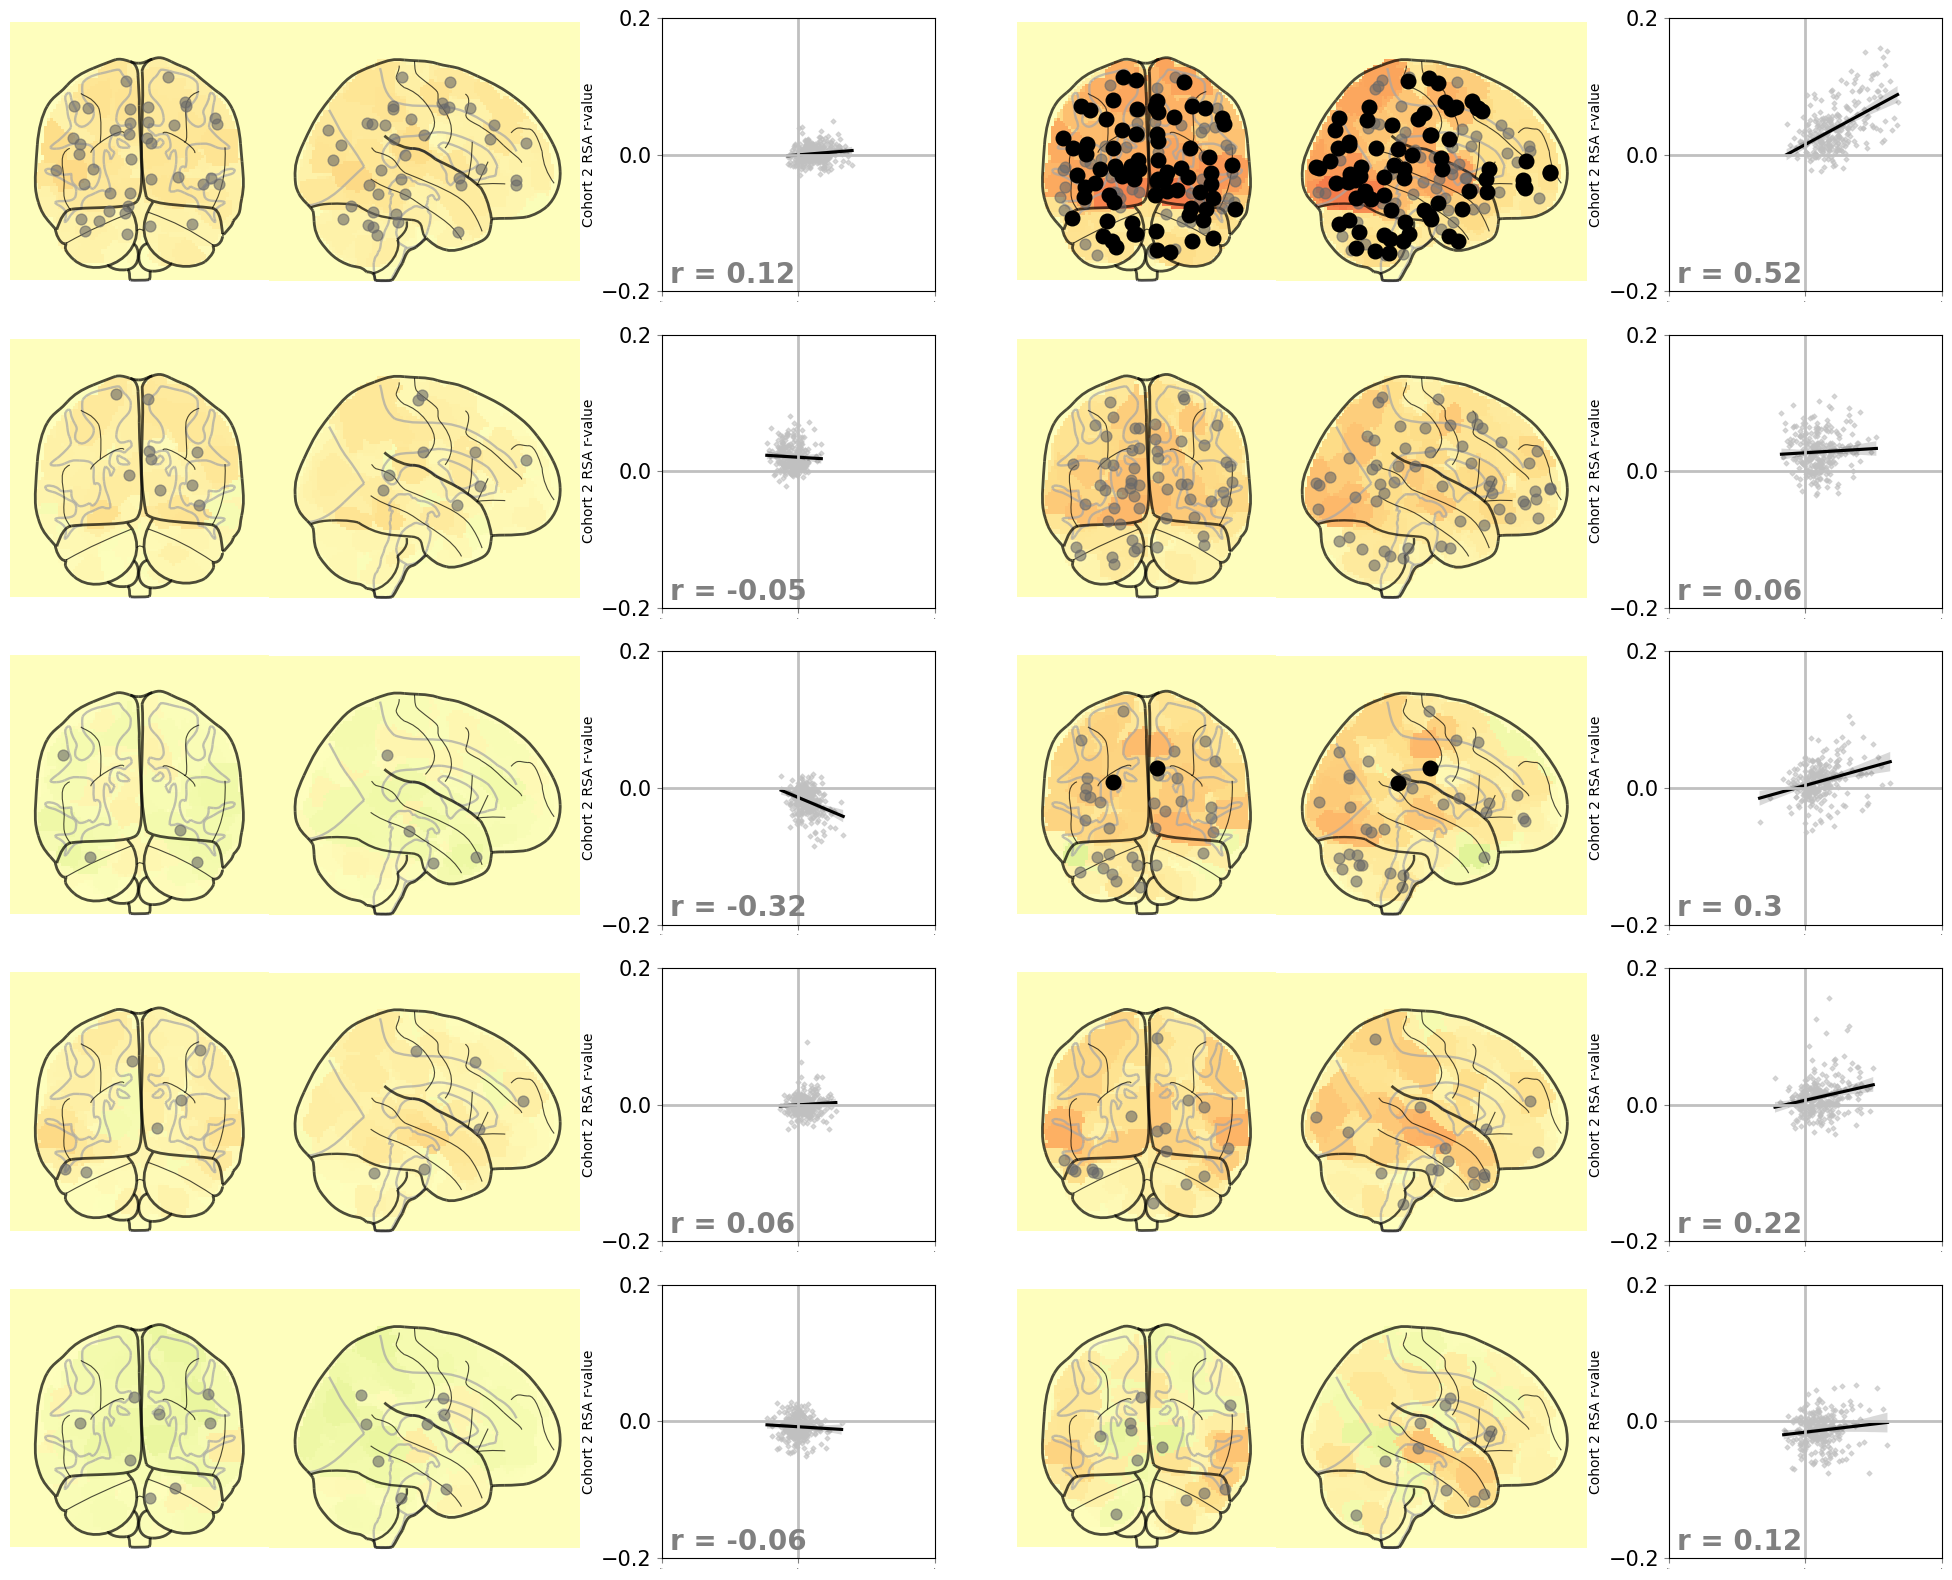

In [5]:
main_res = load_up_result_by_task(use_controls=True,
                            ds='hbn',
                            run='movieDM',
                            run_split_half_opts=[False], 
                            tasks=hbn_tasks,
                            n_perms=10000)
split_res = load_up_result_by_task(use_controls=True,
                            ds='hbn',
                            run='movieDM',
                            run_split_half_opts=[True], 
                            tasks=hbn_tasks,
                            n_perms=2)


df = pd.concat([main_res, split_res])

f = create_figure_for_dataset(ds='hbn',
                             run='movieDM',
                             df=df,
                             tasks=hbn_tasks)
